## 数据操作

### 入门

In [1]:
import torch

In [2]:
x = torch.arange(12)

In [3]:
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
x.shape

torch.Size([12])

In [5]:
x.numel()

12

In [6]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [7]:
x.reshape(-1, 4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [8]:
x.reshape(3, -1)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [9]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [10]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [11]:
torch.randn(3, 4)

tensor([[-0.5168,  0.7816,  0.2002,  0.1313],
        [ 0.2725,  0.3168, -0.3654,  0.2084],
        [ 0.8326, -1.3665,  0.4183, -0.5215]])

In [12]:
x = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

In [13]:
x.shape

torch.Size([3, 4])

### 运算符

In [14]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [15]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [16]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

In [17]:
torch.cat((X, Y), dim=1)

tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])

In [18]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [19]:
X.sum()

tensor(66.)

In [22]:
# 广播机制
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [23]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [24]:
# 索引和切片
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [25]:
X[-1]

tensor([ 8.,  9., 10., 11.])

In [26]:
X[1:3]

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [27]:
X[1, 2] = 9

In [28]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [29]:
X[0:2, :] = 12

In [30]:
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [31]:
# 节省内存
before = id(Y)
Y = Y + X
id(Y) == before

False

In [32]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 1836079026064
id(Z): 1836079026064


In [33]:
before = id(X)
X += Y
before == id(X)

True

In [34]:
# 节省内存的两种方法，也就是原地更新的fangfa
# X[:] = X + Y，X += Y

### 转化为其他Python对象

In [35]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [36]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

In [37]:
# 深度学习存储和操作数据的主要接口是张量。它提供了各种功能，包括基本数学运算，广播，索引，切片
# 内存节省和转换其他Python对象

In [38]:
X

tensor([[26., 25., 28., 27.],
        [25., 26., 27., 28.],
        [20., 21., 22., 23.]])

In [39]:
Y

tensor([[14., 13., 16., 15.],
        [13., 14., 15., 16.],
        [12., 12., 12., 12.]])

In [40]:
X < Y

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

## 数据预处理

### 读取数据

In [67]:
with open('house_tiny.csv', 'w') as f:
    f.write('NumRooms, Alley, Price\n') # 列名
    f.write('nan, Pave, 127500\n')
    f.write('2, nan, 106000\n')
    f.write('4, nan, 178100\n')
    f.write('nan, nan, 14000\n')

In [2]:
import pandas as pd

In [69]:
data = pd.read_csv('house_tiny.csv')

In [71]:
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,nan,106000
2,4.0,nan,178100
3,NaN,nan,14000


### 处理缺失值

In [83]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]

In [84]:
inputs

,NumRooms,Alley
0,NaN,Pave
1,2.0,nan
2,4.0,nan
3,NaN,nan


In [85]:
inputs['NumRooms'] = inputs['NumRooms'].fillna(inputs['NumRooms'].mean())

In [86]:
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,nan
2,4.0,nan
3,3.0,nan


In [87]:
inputs = pd.get_dummies(inputs, dummy_na=True, dtype=int)

In [88]:
inputs

,NumRooms,Alley_ Pave,Alley_ nan,Alley_nan
0,3.0,1,0,0
1,2.0,0,1,0
2,4.0,0,1,0
3,3.0,0,1,0


### 转换为张量的格式

In [89]:
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)

In [90]:
inputs.values

array([[3., 1., 0., 0.],
       [2., 0., 1., 0.],
       [4., 0., 1., 0.],
       [3., 0., 1., 0.]])

In [91]:
y

tensor([127500, 106000, 178100,  14000])

In [92]:
X

tensor([[3., 1., 0., 0.],
        [2., 0., 1., 0.],
        [4., 0., 1., 0.],
        [3., 0., 1., 0.]], dtype=torch.float64)

## 线性代数

In [4]:
# 标量
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [7]:
# 向量
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [8]:
x[3]

tensor(3)

In [9]:
# 长度、维度和形状
len(x)

4

In [10]:
x.shape

torch.Size([4])

In [11]:
# 矩阵
A = torch.arange(20).reshape(5, -1)

In [12]:
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [13]:
# 矩阵转置
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [14]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])

In [15]:
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [16]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [17]:
# 张量
# 张量是描述具有任意数量轴的n维数组的通用方法
# 向量是一阶张量，矩阵是二阶张量

In [18]:
X = torch.arange(24).reshape(2, 3, 4)

In [19]:
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [21]:
# 张量算法的基本性质
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # 通过分配新内存，将A的一个副本分配给B
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [22]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [23]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X

tensor([[[ 2,  3,  4,  5],
         [ 6,  7,  8,  9],
         [10, 11, 12, 13]],

        [[14, 15, 16, 17],
         [18, 19, 20, 21],
         [22, 23, 24, 25]]])

In [24]:
(a * X).shape

torch.Size([2, 3, 4])

In [25]:
a * X

tensor([[[ 0,  2,  4,  6],
         [ 8, 10, 12, 14],
         [16, 18, 20, 22]],

        [[24, 26, 28, 30],
         [32, 34, 36, 38],
         [40, 42, 44, 46]]])

In [26]:
# 降维
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [27]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [29]:
A.sum().item()

190.0

In [30]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [31]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [32]:
A_sum_0 = A.sum(axis=0)
A_sum_0

tensor([40., 45., 50., 55.])

In [33]:
A.sum(axis=[0, 1])

tensor(190.)

In [34]:
A.mean(), A.sum()/A.numel()

(tensor(9.5000), tensor(9.5000))

In [35]:
A.mean(axis=0)

tensor([ 8.,  9., 10., 11.])

In [36]:
sum_A = A.sum(axis=1, keepdims=True)

In [37]:
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [38]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [39]:
# 累加和
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

In [40]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [41]:
# 点积
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [43]:
torch.sum(x*y)

tensor(6.)

In [44]:
# 矩阵-向量积
# 在代码中使用张量表示矩阵-向量积，我们使用mv函数。当我们为矩阵A和向量x调用torch.mv(A, x)时，
# 会执行矩阵-向量积。注意，A的列维数必须与x的维数相同

In [45]:
A.shape

torch.Size([5, 4])

In [46]:
x.shape

torch.Size([4])

In [48]:
ans = torch.mv(A, x)

In [49]:
ans.shape

torch.Size([5])

In [50]:
ans

tensor([ 14.,  38.,  62.,  86., 110.])

In [51]:
# 矩阵-矩阵乘法
B = torch.ones(4, 3)
ans = torch.mm(A, B)

In [52]:
ans.shape

torch.Size([5, 3])

In [53]:
ans

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

In [54]:
# 范数
# 在线代中，向量的范数是将向量映射到标量的函数f。给定任意向量x,向量范数要满足一些属性。
# 第一个，如果我们按常数因子α缩放向量的所有元素，其范数也会按相同常数因子的绝对值缩放f(αx) = |α|f(x)
# 第二个，熟悉的三角不等式f(x+y) <= f(x) + f(y)
# 第三个，范数必须是非负的f(x)>=0

In [55]:
# 计算向量的L2范数
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [56]:
# L1范数
torch.abs(u).sum()  # 将绝对值函数和按元素求和组合起来

tensor(7.)

In [57]:
D = torch.ones((4, 9))

In [58]:
D

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [59]:
torch.norm(D)

tensor(6.)

In [60]:
# 机器学习的整个子领域都侧重于使用矩阵分解及其向高阶张量的泛化，来发现数据集中的结构并解决预测问题
# 当开始动手尝试并在真是数据集上应用了有效的机器学习模型，你会更倾向于学习更多数学

In [78]:
A = torch.arange(24, dtype=torch.float32).reshape((2, 3, 4))

In [63]:
len(A)

2

In [66]:
A = torch.arange(12).reshape((3, 4))

In [67]:
len(A)

3

In [71]:
A / A.sum(axis=1, keepdims=True)

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895]])

In [69]:
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [70]:
A.sum(axis=1)

tensor([ 6, 22, 38])

In [74]:
A.sum(axis=1) 

tensor([[12, 15, 18, 21],
        [48, 51, 54, 57]])

In [75]:
# 形状为(2, 3, 4) axis=0 output=(3, 4)

In [79]:
torch.linalg.norm(A)

tensor(65.7571)

### 微积分

In [80]:
# 在微分学中最重要的应用是优化问题，即考虑如何把事情做到最好
# 在深度学习中，我们“训练”模型，不断更新它们，使它们看到越来越多的数据时变得越来越好
# 通常情况下，变得更好意味着最小化一个损失函数(loss function),即一个衡量“模型有多糟糕”
# 最终，我们真正关心的是生成一个模型，它能够在从未见过的数据上表现良好。但“训练”模型只能将模型
# 与我们实际能看到的数据相拟合，因此我们可以将拟合模型的任务分解为两个关键问题
# 优化(optimization): 用模型拟合观测数据的过程
# 泛化(generalization): 数学原理和实践者的智慧，能够指导我们生成出有效性超过用于训练的数据集本身的模型

In [81]:
# 倒数和微分

In [82]:
# 做一个实验，定义u = f(x) = 3x**2 - 4x

In [15]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [16]:
def f(x):
    return 3 * x**2 - 4*x

In [17]:
# 通过令x=1并让h接近0,(f(x+h) - f(x))/h 数值结果接近2
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

In [21]:
h = 0.1
for i in range(10):
    print(f'h={h: .5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h= 0.10000, numerical limit=2.30000
h= 0.01000, numerical limit=2.03000
h= 0.00100, numerical limit=2.00300
h= 0.00010, numerical limit=2.00030
h= 0.00001, numerical limit=2.00003
h= 0.00000, numerical limit=2.00000
h= 0.00000, numerical limit=2.00000
h= 0.00000, numerical limit=2.00000
h= 0.00000, numerical limit=2.00000
h= 0.00000, numerical limit=2.00000


In [6]:
# #@save负号是将函数保存到d2l包中，以后可以直接调用 d2l.use_svg_display()

In [7]:
#@save 在d2l包文件夹下定义一个save.py 文件，里面定义一个装饰器
from d2l.save import save

In [22]:
#@save
def use_svg_display() :
    # 使用svg格式在Jupyter中显示绘图
    # 获得高质量图像
    backend_inline.set_matplotlib_formats('svg')

In [9]:
# 定义set_figsize函数来设置图表的大小，注意，这里可以直接使用d2l.plt,因为导入语句
# from matplorlib import pyplot as plt以标记为保存在d2l包中

In [23]:
#@save
def set_figsize(figsize=(3.5, 2.5)):  
    # 设置matplotlib图表大小
    # rcParams是一个字典用于储存各种配置参数
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [11]:
# 下面的set_axes函数用于设置由matplotlib生成图表的轴的属性

In [24]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)  # 设置标题
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)  # 刻度类型
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)      # 范围
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid() # 添加网格线

In [25]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
        ylim=None, xscale='linear', yscale='linear',
        fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []
        
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca() # 获取当前坐标轴对象
    
    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, 'ndim') and X.ndim == 1 or isinstance(X, list)
               and not hasattr(X[0], '__len__'))
    
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

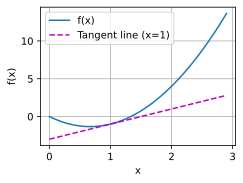

In [26]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2*x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [1]:
import matplotlib.pyplot as plt

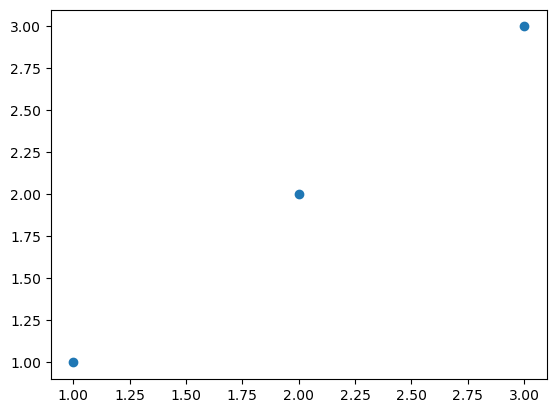

In [3]:
plt.scatter([1,2,3], [1,2,3])

In [4]:
import numpy as np

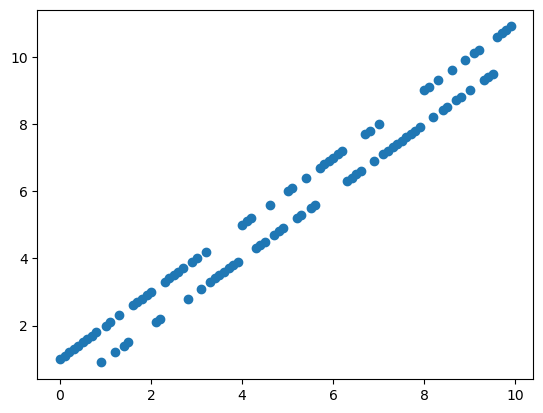

In [14]:
x = np.arange(0, 10, 0.1)
y = np.arange(0, 10, 0.1)+[np.random.randint(2) for _ in range(100)]
plt.scatter(x, y)

In [1]:
# 微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题
# 倒数可以被解释为函数相对于其变量的瞬时变化率，它也是函数曲线的切线的斜率
# 梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数
# 链式法则可以用来微分复合函数

In [2]:
# 对于复杂的模型，手工进行更新是一件很痛苦的事。
# 深度学习框架通过自动计算倒数，即自动微分来加快求导。
# 自动微分使系统能够随后反向传播梯度，这里，反向传播意味着跟踪整个计算图
# 填充关于每个参数的偏导数

In [4]:
# 一个简单的例子
import torch

In [4]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [5]:
# 注，一个标量函数关于向量x的梯度是向量，并且与x具有相同的形状
x.requires_grad_(True)  # 等价于x=torch.arange(4.0, requires_grad=True)
x.grad  # 默认值是None

In [11]:
# requires_grad_(True)函数的作用：
# 该属性用于指定张量是否需要梯度计算，并自动计算梯度
# grad(梯度)是指损失函数对于模型参数的偏导数。

In [6]:
y = 2*torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [7]:
# 通过调用反向传播函数来自动计算y关于x每个分量的梯度
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [12]:
# backward()是一个用于计算梯度的方法，它被用来执行自动微分并计算关于某个标量张量y的梯度
# 该方法在反向传播期间使用，通过链式法则将梯度从输出层传播回模型的参数
# 计算的得到的梯度将被存储在各个张量的grad属性中

In [8]:
# y = 2xTx关于x的梯度应为4x
x.grad == 4*x

tensor([True, True, True, True])

In [9]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [10]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [14]:
x.grad.zero_()

tensor([0., 0., 0., 0.])

In [15]:
x.grad

tensor([0., 0., 0., 0.])

In [16]:
x

tensor([0., 1., 2., 3.], requires_grad=True)

### 非标量变量的反向传播

In [17]:
# 当y不是标量时，向量y关于向量x的导数的最自然的解释是一个矩阵。
# 对于高阶和高维的y和x，求导的结果可以是一个高阶张量
# 虽然这些都出现在高级机器学习中，但当调用向量的反向计算时，我们通常会试图计算
# 一批训练样本中每个组成部分的损失函数的导数。这里，我们的目的不是计算微分矩阵，
# 而是单独计算批量中每个样本的偏导数之和。

In [20]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度
# 本例只想求偏导数之和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### 分离计算

In [25]:
# 例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。
# 但是我们想计算z关于x的梯度，所以需要将y视为一个常数，并且只考虑到x在y被计算后发挥作用
# 这里分离y来返回一个新变量u，该变量与y具有相同的值，但丢弃计算图中如何计算y的任何信息。
# 换句话说，梯度不会向后流经u到x。
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()  # 当执行完backward()之后，x.grad的值就自动计算了
x.grad == u

tensor([True, True, True, True])

In [27]:
x.grad.zero_()
y.sum().backward()
x.grad == 2*x

tensor([True, True, True, True])

In [28]:
u

tensor([0., 1., 4., 9.])

### Python控制流的梯度计算

In [29]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [36]:
a = torch.randn(1, requires_grad=True)
d = f(a)
d.backward()
a.grad == d / a

tensor([True])

In [34]:
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [35]:
x*x

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)

# 概率

In [11]:
# 基本概率论
%matplotlib inline
from torch.distributions import multinomial
# from d2l import torch as d2l

In [12]:
# 为了抽取一个样本，即掷色子，我们需要传入一个概率向量，输出是另一个相同长度的向量
# 它在索引i处的值是采样结果中i出现的次数
fair_probs = torch.ones([6])/6  # 每一面朝上的概率
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [13]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([3., 2., 1., 1., 1., 2.])

In [14]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000 # 相对频率作为估计值

tensor([0.1660, 0.1610, 0.1590, 0.1690, 0.1600, 0.1850])

In [15]:
# 进行500组实验
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)

In [16]:
cum_counts

tensor([[  1.,   3.,   3.,   1.,   1.,   1.],
        [  3.,   4.,   4.,   2.,   5.,   2.],
        [  4.,   4.,   4.,   5.,   9.,   4.],
        ...,
        [821., 840., 798., 811., 870., 840.],
        [823., 841., 800., 815., 871., 840.],
        [823., 841., 803., 818., 874., 841.]])

In [1]:
import matplotlib.pyplot as plt

In [19]:
import d2l

In [22]:
# 让matplotlib画的图更清晰，设置plt.figure(figsize=(), dpi=300)
# 调整dpi值以获得更高的分辨率
# 保存图形并指定DPI
# plt.savefig('output.png', dpi=300)

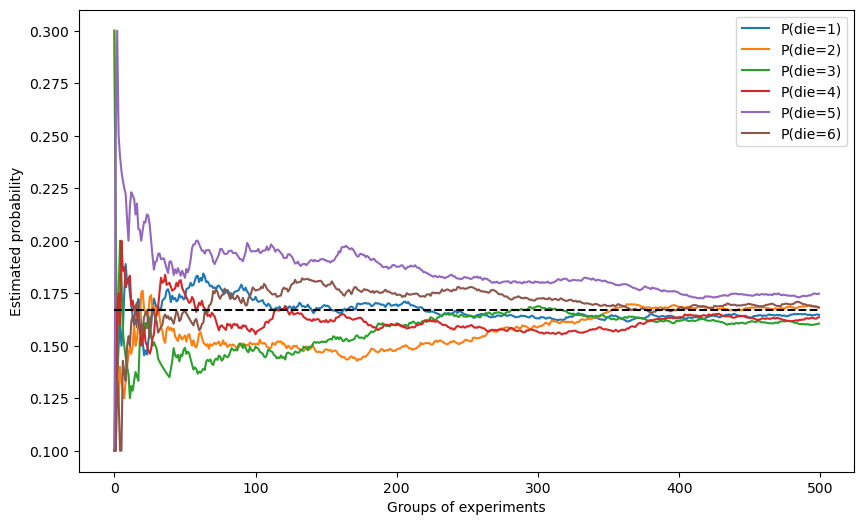

In [38]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(x.numpy(), estimates[:, i].numpy(),
                label=("P(die=" + str(i + 1) + ")"))
plt.plot(x.numpy(), y.numpy(), color='black', linestyle='dashed')
plt.xlabel('Groups of experiments')
plt.ylabel('Estimated probability')
plt.legend(loc='best')
plt.savefig('output.jpeg', dpi=300)
plt.show()

In [5]:
x = torch.arange(500)

In [6]:
y = torch.arange(500, dtype = torch.float32)
y[:] = 0.167

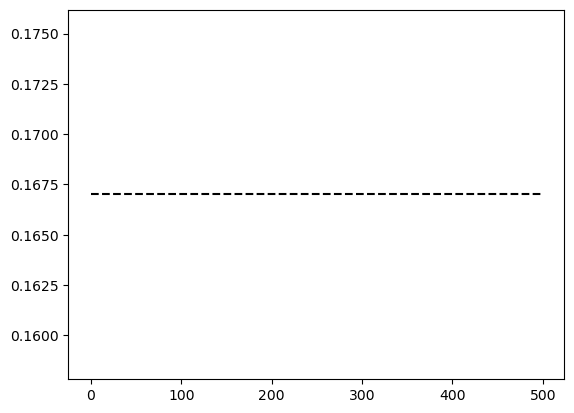

In [10]:
plt.plot(x.numpy(), y.numpy(), color='black', linestyle='dashed')